# STORYTELLING  CON PLOTLY & WIDGETS

# STORYTELLING WITH PLOTLY & WIDGETS

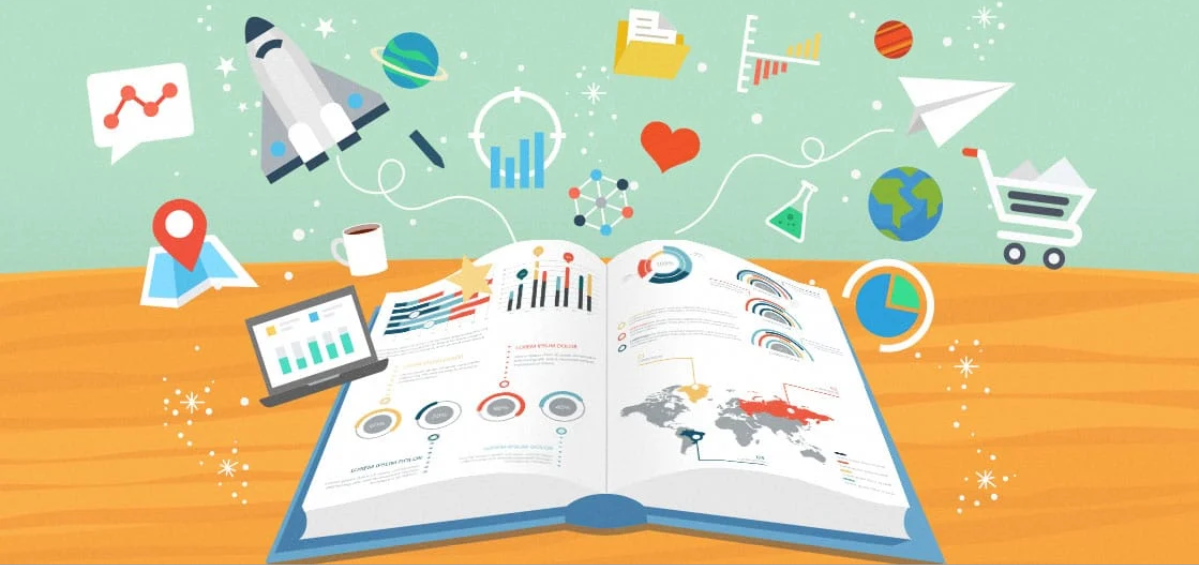

In [321]:
from PIL import Image               # to load images
from IPython.display import display
pil_im = Image.open('C:\\Users\MSI\\OneDrive\\Zero\\Captura3.png')
display(pil_im)

In [1]:
import pandas as pd
import datetime as dt
import time as tm
import numpy as np
import matplotlib.pyplot as plt

import sklearn

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import seaborn as sns

import os
import ipywidgets as widgets
import cartopy
import cartopy.crs as ccrs
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from pandas.core.reshape.concat import concat


In [2]:
os.chdir(r'C:\Users\MSI\OneDrive\ULead')

In [259]:
IFrame(src='http://sistemas.inec.cr/pad5/index.php/catalog/244/data-dictionary/F10?file_name=ENIGH%202018%20BASE%20HOGARES', width=700, height=600)

Esta data proviene del Estudio Realizado por INEC, esta institucion se encarga de realizar encuentas que sirven para medir ingresos, egresos, tipologias de la poblacion costarricense.


This data comes from the Study carried out by INEC, this institution is in charge of conducting surveys that are used to measure income, expenses, and typologies of the Costa Rican population.

In [3]:
data = pd.read_spss('Enigh2018_CreaVar_ Hogar_PUBLICA(2).sav')

In [4]:
data.head(10)

UPM_CONSEC ID_ESTRUCTURA ID_PARTE  ID_VIVIENDA  ID_HOGAR    LLAVE_HOGAR  \
0        230           051      001          8.0       2.0  1230051001082   
1        071           096      001         11.0       2.0  1071096001112   
2        230           051      001          8.0       3.0  1230051001083   
3        296           008      000          1.0       2.0  1296008000012   
4        296           008      000          1.0       3.0  1296008000013   
5        064           021      000          5.0       1.0  1064021000051   
6        064           021      000          5.0       3.0  1064021000053   
7        286           053      000         13.0       3.0  1286053000133   
8        157           102      000         21.0       1.0  1157102000211   
9        157           102      000         21.0       2.0  1157102000212   

  ID_DECENA         ID_REGION ID_ZONA ID1_MAS_HOG  ...  \
0        18         Chorotega   Rural        1-Si  ...   
1        06           Central  Urbano        1-Si  ...   
2        18         Chorotega   Rural        1-Si  ...   
3        23  Pacífico Central   Rural        1-Si  ...   
4        23  Pacífico Central   Rural        1-Si  ...   
5        05  Huetar Atlántico  Urbano        1-Si  ...   
6        05  Huetar Atlántico  Urbano        1-Si  ...   
7        22  Huetar Atlántico   Rural        1-Si  ...   
8        13           Central  Urbano        1-Si  ...   
9        13           Central  Urbano        1-Si  ...   

  H337F_MANTIENE_DEUDA_OTROS H350_TIPOLOGIA_HOGAR  \
0                         No   Conyugal con hijos   
1                         No         Monoparental   
2                         No         Monoparental   
3                         No          Unipersonal   
4                         No          Unipersonal   
5                         No          Unipersonal   
6                         No          Unipersonal   
7                         No   Conyugal sin hijos   
8                         No   Conyugal sin hijos   
9                         No   Conyugal con hijos   

                   H351_PERCEP_INGRESO_ALCANZA H352_PERCEPCION_POBREZA FACTOR  \
0  No les alcanza, tienen algunas dificultades                      Si   99.0   
1  No les alcanza, tienen algunas dificultades                      Si  459.0   
2  No les alcanza, tienen grandes dificultades                      Si   99.0   
3                           Les alcanza, justo                      No  174.0   
4                           Les alcanza, justo                      No  174.0   
5  No les alcanza, tienen grandes dificultades                      Si  155.0   
6  No les alcanza, tienen algunas dificultades                      Si  155.0   
7  No les alcanza, tienen algunas dificultades                      Si  197.0   
8  No les alcanza, tienen algunas dificultades                      No  493.0   
9                           Les alcanza, justo                      Si  493.0   

  ESTRATO QUINTIL_NACIONAL DECIL_NACIONAL QUINTIL_ZONA DECIL_ZONA  
0    12.0              1.0            2.0          2.0        4.0  
1     8.0              2.0            4.0          2.0        3.0  
2    12.0              1.0            1.0          1.0        1.0  
3     5.0              4.0            7.0          5.0        9.0  
4     5.0              4.0            8.0          5.0       10.0  
5     4.0              4.0            7.0          4.0        7.0  
6     4.0              1.0            2.0          1.0        2.0  
7     2.0              3.0            5.0          3.0        6.0  
8     8.0              4.0            7.0          3.0        6.0  
9     8.0              3.0            6.0          3.0        5.0  

[10 rows x 341 columns]

# Utilizaremos esta Data para poder contestar  una pregunta importante : 
¿ El Bono de Vivienda  llega a las  familias que lo necesitan, cual es lo que determina como una  familia  obtiene un  bono?


# We will use this Data to be able to answer an important question:
Does the Housing Bonus reach the families that need it, what determines how a family gets a bond?

Para constestar esta pregunta  debemos  entender  que es un Bono de Vivienda, de donde proviene  y que institucion(es) trabajan para otorgarlo.

To answer this question, we must understand what a Housing Bond is, where it comes from and which institution (s) work to grant it.

In [5]:
data.describe()



ID_VIVIENDA     ID_HOGAR  H029_DORMITORIOS_EXCLUSIVOS  \
count  7046.000000  7046.000000                   127.000000   
mean     11.015044     1.010219                     1.448819   
std       6.060335     0.108715                     0.742247   
min       1.000000     1.000000                     0.000000   
25%       6.000000     1.000000                     1.000000   
50%      11.000000     1.000000                     1.000000   
75%      16.000000     1.000000                     2.000000   
max      21.000000     3.000000                     3.000000   

       H030_DORMITORIOS_COMPARTIDOS  H034_CANT_LINEAS  H036_CANT_LINEAS  \
count                    127.000000       6804.000000       1917.000000   
mean                       0.196850          2.402851          1.018258   
std                        0.604735          1.202842          0.152161   
min                        0.000000          1.000000          1.000000   
25%                        0.000000          2.000000          1.000000   
50%                        0.000000          2.000000          1.000000   
75%                        0.000000          3.000000          1.000000   
max                        3.000000         10.000000          4.000000   

       H041_CANT_PORTATIL  H043_CANT_COMP_ESCRIT  H045_CANT_TABLET  \
count         2654.000000             734.000000       1108.000000   
mean             1.328937               1.080381          1.278881   
std              0.680302               0.334993          0.600230   
min              1.000000               1.000000          1.000000   
25%              1.000000               1.000000          1.000000   
50%              1.000000               1.000000          1.000000   
75%              1.000000               1.000000          1.000000   
max              7.000000               4.000000          5.000000   

       H047_CANT_RADIO  ...  H324_PAGO_MES_PRESTAMISTAS  \
count      4011.000000  ...                7.046000e+03   
mean          1.068312  ...                3.070000e+03   
std           0.306733  ...                4.271131e+04   
min           1.000000  ...                0.000000e+00   
25%           1.000000  ...                0.000000e+00   
50%           1.000000  ...                0.000000e+00   
75%           1.000000  ...                0.000000e+00   
max           7.000000  ...                3.100000e+06   

       H325_PAGO_MES_OTROS_CREDITOS  H326_PAGO_MES_TARJETAS_CONTADO  \
count                   7046.000000                    7.046000e+03   
mean                    4762.342606                    3.042023e+04   
std                    33371.554525                    1.952571e+05   
min                        0.000000                    0.000000e+00   
25%                        0.000000                    0.000000e+00   
50%                        0.000000                    0.000000e+00   
75%                        0.000000                    0.000000e+00   
max                  1000000.000000                    5.800000e+06   

       H327_PAGO_MES_CREDITOS      FACTOR      ESTRATO  QUINTIL_NACIONAL  \
count            7.046000e+03  7046.00000  7046.000000       7046.000000   
mean             1.078360e+05   218.37979     7.566846          2.830258   
std              2.298404e+05   165.38397     3.973868          1.414163   
min              0.000000e+00    58.00000     1.000000          1.000000   
25%              0.000000e+00    99.00000     4.000000          2.000000   
50%              2.000000e+04   139.00000     8.000000          3.000000   
75%              1.169000e+05   290.00000    11.000000          4.000000   
max              5.880000e+06   774.00000    14.000000          5.000000   

       DECIL_NACIONAL  QUINTIL_ZONA   DECIL_ZONA  
count     7046.000000   7046.000000  7046.000000  
mean         5.139512      2.869004     5.222821  
std          2.875556      1.425316     2.902293  
min          1.000000      1.000000     1.000000  
25%        

# # ¿Que es un Bono de Vivienda ?

# # What is a Housing Bond?

In [260]:
IFrame(src='https://www.banhvi.fi.cr/quienes_somos/', width=700, height=600)

El bono familiar de vivienda es un subsidio o ayuda, que el Estado, en forma solidaria, otorga a las familias de escasos recursos económicos, clase media, personas con discapacidad, mujeres jefas de hogar y ciudadanos adultos mayores, para que unido a su capacidad de crédito, solucionen sus problemas de vivienda
La institucion encargada de otorgar atravez de socios comerciales que tiene el estado costarricense el  bono a las familias se llama Banhvi.

The family housing voucher is a subsidy or aid that the State, in solidarity, grants to families with limited economic resources, the middle class, people with disabilities, women heads of households and elderly citizens, so that together with their capacity credit, solve your housing problems
The institution in charge of granting the bond to families through commercial partners that the Costa Rican state has is called Banhvi.

# #Condiciones para el bono de vivienda

# #Conditions for the housing bond

1. Formar parte de un núcleo familiar que vive bajo un mismo techo y comparten las obligaciones del hogar. Debe existir al menos una persona mayor de edad.

2. No tener casa propia o más de una propiedad. De contar con lote, puede solicitar el Bono para construir la vivienda en el lote propio y si tiene casa, pero requiere reparaciones o mejoras, puede solicitar el Bono RAMT para este fin.

3. No haber recibido con anterioridad el Bono, pues se otorga solo una vez.

4. Tener un ingreso familiar menor a ¢1.656.816 al día de hoy. Si es para un bono de extrema necesidad el monto máximo de ingreso familiar es de ¢414.204. Estos montos se refiere a la suma de los salarios brutos (sin rebajos) de los que trabajan en la familia.

5. Ser costarricense o contar con residencia legalizada en el país.

1. Being part of a family nucleus that lives under the same roof and shares the obligations of the home. There must be at least one person of legal age.

2. Not having your own house or more than one property. If you have a lot, you can request the Bond to build the house on your own lot and if you have a house but require repairs or improvements, you can request the RAMT Bond for this purpose.

3. Not having previously received the Bonus, as it is awarded only once.

4. Have a family income of less than ¢ 1,656,816 as of today. If it is for an extreme need bond, the maximum amount of family income is ¢ 414,204. These amounts refer to the sum of the gross wages (without deductions) of those who work in the family.

5. Be Costa Rican or have legalized residence in the country.

In [6]:
data.dtypes

UPM_CONSEC           object
ID_ESTRUCTURA        object
ID_PARTE             object
ID_VIVIENDA         float64
ID_HOGAR            float64
                     ...   
ESTRATO             float64
QUINTIL_NACIONAL    float64
DECIL_NACIONAL      float64
QUINTIL_ZONA        float64
DECIL_ZONA          float64
Length: 341, dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Columns: 341 entries, UPM_CONSEC to DECIL_ZONA
dtypes: category(83), float64(253), object(5)
memory usage: 14.4+ MB


In [8]:
data.shape

(7046, 341)

In [9]:
data.size

2402686

Esta  variable es la que nos muestra enforma boleana(si,no) quienes han  recibido  el bono, la utilizaremos para entender si las familias beneficiadas han cumplido con lo dicta la  ley  y si el grupo que no lo tiene, es correcto no proceder a que el estado les otorgue tambien el  beneficion
Convertimos la variable que esta 'str' a 'int' pero siempre categorica.

This variable is the one that shows us in a boolean way (yes, no) who has received the bonus, we will use it to understand if the beneficiary families have complied with the law and if the group that does not have it, it is correct not to proceed to the state also grants them the benefit
We convert the variable that is 'str' to 'int' but always categorical.

In [10]:
data['H090_BONO_VIVIENDA'] = data['H090_BONO_VIVIENDA'].cat.codes

In [11]:
data['H090_BONO_VIVIENDA']

0       0
1       0
2       0
3       0
4       0
       ..
7041    0
7042    0
7043    0
7044    0
7045    1
Name: H090_BONO_VIVIENDA, Length: 7046, dtype: int8

Creamos un subset de datos, dado que  no todas las  variables del data set original son necesarias.

We create a data subset, since not all the variables of the original data set are necessary.

In [12]:
Social = data[['ID_ZONA','ID_REGION','LLAVE_HOGAR','H001_TIPO_VIVIENDA','H074_PAGAN_ALOJ','H078_CANT_MIEMBROS_HOGAR','H082_SEXO_JEFE','H083_EDAD_JEFE','H350_TIPOLOGIA_HOGAR','H085_MIEMBROS_OCUPADOS','H086_MIEMBROS_DESEMPLEADOS','H090_BONO_VIVIENDA','HG10_TIPO_BONO','H091_IMAS_DINERO','H139_SALARIO_NETO_TOTAL','H207_INGRESO_TOTAL_NETO_PC_CVL','H317_INGRESO_DISPONIBLE','H231_GASTO_TOTAL_ALIM_BEBID','H240_GASTO_AGUAS_Y_OTROS','H255_GASTO_TOTAL_SALUD','H260_GASTO_TOTAL_TRANSPORTE','H274_GASTO_TOTAL_EDUCACION']]

Para iniciar nuestro EDA(Exploratory Data Analysis), vemos si no se encuentran Nulos dentro de nuestro datos, esto con el fin de darle un  tratamiento adecuado, que sea desde imputarlos hasta cambiarlos.

To start our EDA (Exploratory Data Analysis), we see if Nulls are not found within our data, this in order to give it an adequate treatment, which is from imputing them to changing them.

In [13]:
mascaraNulos = Social.isna()
mascaraNulos

ID_ZONA  ID_REGION  LLAVE_HOGAR  H001_TIPO_VIVIENDA  H074_PAGAN_ALOJ  \
0       False      False        False               False            False   
1       False      False        False               False            False   
2       False      False        False               False            False   
3       False      False        False               False            False   
4       False      False        False               False            False   
...       ...        ...          ...                 ...              ...   
7041    False      False        False               False            False   
7042    False      False        False               False            False   
7043    False      False        False               False            False   
7044    False      False        False               False            False   
7045    False      False        False               False            False   

      H078_CANT_MIEMBROS_HOGAR  H082_SEXO_JEFE  H083_EDAD_JEFE  \
0                        False           False           False   
1                        False           False           False   
2                        False           False           False   
3                        False           False           False   
4                        False           False           False   
...                        ...             ...             ...   
7041                     False           False           False   
7042                     False           False           False   
7043                     False           False           False   
7044                     False           False           False   
7045                     False           False           False   

      H350_TIPOLOGIA_HOGAR  H085_MIEMBROS_OCUPADOS  ...  HG10_TIPO_BONO  \
0                    False                   False  ...            True   
1                    False                   False  ...            True   
2                    False                   False  ...            True   
3                    False                   False  ...            True   
4                    False                   False  ...            True   
...                    ...                     ...  ...             ...   
7041                 False                   False  ...            True   
7042                 False                   False  ...            True   
7043                 False                   False  ...            True   
7044                 False                   False  ...            True   
7045                 False                   False  ...           False   

      H091_IMAS_DINERO  H139_SALARIO_NETO_TOTAL  \
0                False                    False   
1                False                    False   
2                False                    False   
3                False                    False   
4                False                    False   
...                ...                      ...   
7041             False                    False   
7042             False                    False   
7043             False                    False   
7044             False                    False   
7045             False                    False   

      H207_INGRESO_TOTAL_NETO_PC_CVL  H317_INGRESO_DISPONIBLE  \
0                              False                    False   
1                              False                    False   
2                              False                    False   
3                              False                    False   
4                              False                    False   
...                              ...                      ...   
7041                           False                    False   
7042                           False                    False   
7043                           False                    False   
7044                           False                    False   
7045                           False           

In [14]:
mascaraNulos.H139_SALARIO_NETO_TOTAL.value_counts()

False    7046
Name: H139_SALARIO_NETO_TOTAL, dtype: int64

Hacemos un  conteo de la  variable Bono, como  observamos solo 1510 familias han sido  beneficiadas con el programa de vivienda del Estado,osea solo  21%  se  encuentra dentro de los  beneficiarios.

We do a count of the Bono variable, as we observe only 1,510 families have benefited from the State housing program, that is, only 21% are among the beneficiaries.

In [15]:
Social.H090_BONO_VIVIENDA.value_counts()

0    5536
1    1510
Name: H090_BONO_VIVIENDA, dtype: int64

# Correlación

# Correlation

La correlación Es una técnica de análisis de información con base estadística y, por ende, matemática. Consiste en analizar la relación entre, al menos, dos variables - p.e. dos campos de una base de datos o de un log o raw data-. El resultado debe mostrar la fuerza y el sentido de la relación.
Existen tres tipos de correlacion :
1- Correlacion Positiva : las variables crecen juntas.
2- Correlacion Negativa : una de variables crece por ende otra decrese.
3- Sin correlacion : tiene un angulo de 90 grados o 0.0, por ende no existe correlacion.

Correlation It is a technique for analyzing information with a statistical and, therefore, mathematical basis. It consists of analyzing the relationship between at least two variables - e.g. two fields from a database or from a log or raw data-. The result should show the strength and meaning of the relationship.
There are three types of correlation:
1- Positive Correlation: the variables grow together.
2 - Negative correlation: one of the variables grows, therefore another decreases.
3- No correlation: it has an angle of 90 degrees or 0.0, therefore there is no correlation.

Buscamos entender que variables estan correlationadas positiva o negativamente con la  variable  H090_Bono_Vivienda.

We seek to understand which variables are positively or negatively correlated with the variable H090 _Bond_ Housing.

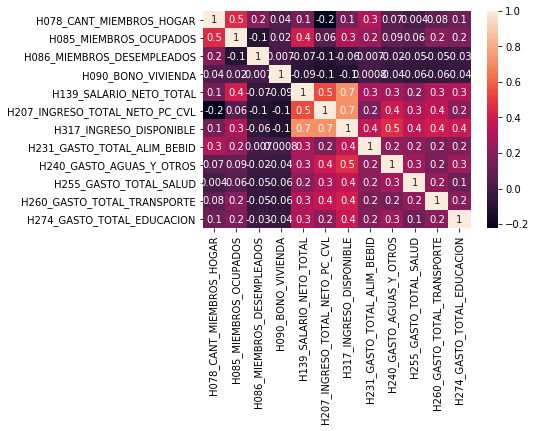

In [41]:
sns.heatmap(Social.corr(), annot = True, fmt='.1g')

In [42]:
Social.corr()

H078_CANT_MIEMBROS_HOGAR  \
H078_CANT_MIEMBROS_HOGAR                        1.000000   
H085_MIEMBROS_OCUPADOS                          0.453920   
H086_MIEMBROS_DESEMPLEADOS                      0.181852   
H090_BONO_VIVIENDA                              0.041876   
H139_SALARIO_NETO_TOTAL                         0.142585   
H207_INGRESO_TOTAL_NETO_PC_CVL                 -0.223643   
H317_INGRESO_DISPONIBLE                         0.139598   
H231_GASTO_TOTAL_ALIM_BEBID                     0.312098   
H240_GASTO_AGUAS_Y_OTROS                        0.066979   
H255_GASTO_TOTAL_SALUD                          0.004170   
H260_GASTO_TOTAL_TRANSPORTE                     0.079015   
H274_GASTO_TOTAL_EDUCACION                      0.116419   

                                H085_MIEMBROS_OCUPADOS  \
H078_CANT_MIEMBROS_HOGAR                      0.453920   
H085_MIEMBROS_OCUPADOS                        1.000000   
H086_MIEMBROS_DESEMPLEADOS                   -0.095759   
H090_BONO_VIVIENDA                            0.020009   
H139_SALARIO_NETO_TOTAL                       0.406459   
H207_INGRESO_TOTAL_NETO_PC_CVL                0.063093   
H317_INGRESO_DISPONIBLE                       0.305947   
H231_GASTO_TOTAL_ALIM_BEBID                   0.242920   
H240_GASTO_AGUAS_Y_OTROS                      0.086772   
H255_GASTO_TOTAL_SALUD                        0.059899   
H260_GASTO_TOTAL_TRANSPORTE                   0.195628   
H274_GASTO_TOTAL_EDUCACION                    0.166383   

                                H086_MIEMBROS_DESEMPLEADOS  \
H078_CANT_MIEMBROS_HOGAR                          0.181852   
H085_MIEMBROS_OCUPADOS                           -0.095759   
H086_MIEMBROS_DESEMPLEADOS                        1.000000   
H090_BONO_VIVIENDA                                0.006511   
H139_SALARIO_NETO_TOTAL                          -0.065730   
H207_INGRESO_TOTAL_NETO_PC_CVL                   -0.105143   
H317_INGRESO_DISPONIBLE                          -0.055607   
H231_GASTO_TOTAL_ALIM_BEBID                       0.007087   
H240_GASTO_AGUAS_Y_OTROS                         -0.023650   
H255_GASTO_TOTAL_SALUD                           -0.045351   
H260_GASTO_TOTAL_TRANSPORTE                      -0.047614   
H274_GASTO_TOTAL_EDUCACION                       -0.032439   

                                H090_BONO_VIVIENDA  H139_SALARIO_NETO_TOTAL  \
H078_CANT_MIEMBROS_HOGAR                  0.041876                 0.142585   
H085_MIEMBROS_OCUPADOS                    0.020009                 0.406459   
H086_MIEMBROS_DESEMPLEADOS                0.006511                -0.065730   
H090_BONO_VIVIENDA                        1.000000                -0.088250   
H139_SALARIO_NETO_TOTAL                  -0.088250                 1.000000   
H207_INGRESO_TOTAL_NETO_PC_CVL           -0.122527                 0.538188   
H317_INGRESO_DISPONIBLE                  -0.110503                 0.719534   
H231_GASTO_TOTAL_ALIM_BEBID               0.000765                 0.285984   
H240_GASTO_AGUAS_Y_OTROS                 -0.038704                 0.280010   
H255_GASTO_TOTAL_SALUD                   -0.055484                 0.201452   
H260_GASTO_TOTAL_TRANSPORTE              -0.058815                 0.313811   
H274_GASTO_TOTAL_EDUCACION               -0.041224                 0.323376   

                                H207_INGRESO_TOTAL_NETO_PC_CVL  \
H078_CANT_MIEMBROS_HOGAR                             -0.223643   
H085_MIEMBROS_OCUPADOS                                0.063093   
H086_MIEMBROS_DESEMPLEADOS                           -0.105143   
H090_BONO_VIVIENDA                                   -0.122527   
H139_SALARIO_NETO_TOTAL                               0.538188   
H207_INGRESO_TOTAL_NETO_PC_CVL                        1.000000   
H317_INGRESO_DISPONIBLE                               0.722719   
H231_GASTO_TOTAL_ALIM_BEBID                           0.166373   
H240_GASTO_AGUAS_Y_OTROS                              0.384209   
H

Como pudimos observar tenemos un correlacion leve negativa y positiva entre las diferentes variables y variable  H090_Bono_Vivienda, esto nos indica que no hay una relacion que pueda afectar en gran medida el tener o no el ingreso del Estado por Bono de Vivienda.

As we could see, we have a slight negative and positive correlation between the different variables and variable H090 _Bond_ Housing, this indicates that there is no relationship that can greatly affect whether or not the State has income from Bond of Housing.

# Utilizacion de  Plotly en sus diferentes formas para contar una historia

# Using Plotly in its different forms to tell a story

In [237]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
diod=Social['H090_BONO_VIVIENDA'].value_counts().reset_index()
diod.iplot(kind='pie',labels='index',values='H090_BONO_VIVIENDA',title = 'Distribucion Bono de Vivienda',pull=.05,colors = ["orange","blue"],
           textposition='inside',textinfo='value+percent')

Este Pie nos muestra el porcentaje como esta distribuido la  variable categorica  H090_Bono_Vivienda, con menor cantidad las familias que obtiene el programa de subsidio gubernamental

This Pie shows us the percentage how the categorical variable H090 _Bono_ Housing is distributed, with fewer families that obtain the government subsidy program

Scatter plot nos indica la concentracion del Ingreso por Salario segun la region del Pais por Familia.
Vemos como la  region Central(Capital + 3 provincias mas ) concentran mayor puntos de ingreso por salario.

Scatter plot indicates the concentration of Salary Income according to the region of the Country by Family.
We see how the Central region (Capital + 3 more provinces) concentrate higher income points per salary.

In [67]:
fig = px.scatter(Social, x="ID_REGION", y="H139_SALARIO_NETO_TOTAL")
fig.show()

# Histogramas  y Densidad

# Histograms and Density

In [240]:
    
fig = px.histogram(Social, x="H207_INGRESO_TOTAL_NETO_PC_CVL", color="H090_BONO_VIVIENDA")
fig.show()

In [239]:

fig = px.histogram(Social, x="H317_INGRESO_DISPONIBLE", color="H090_BONO_VIVIENDA")
fig.show()

Como pudimos observar el  grupo Rojo tiene mas Ingreso Disponible, mas  tambien esto nos indica que las  variables estan muy continuas, cosa que nos representa un  problema para poder inferir las diferencias entre familias con  Bono o sin Bono.
Por tal motivo realizamos a crear dos subset para estudiar con mayor detenimiento cuales son las caracteristicas de las familias que tienen el  beneficio.

As we could see, the Red group has more Available Income, but this also indicates that the variables are very continuous, which represents a problem for us to be able to infer the differences between families with or without Bonus.
For this reason, we created two subset to study in greater detail which are the characteristics of the families that have the benefit.

In [19]:
No_Bono = Social[Social['H090_BONO_VIVIENDA']== 0]

# EDA para subset Bono

# EDA for Bono subset

Estudiaremos el subset formado por las Familias a las cuales les consignaron el Bono, para poder entender cuales variables son de mayor importancia en el otrogamiento del programa,

We will study the subset formed by the Families to whom the Voucher was assigned, in order to understand which variables are of greater importance in the granting of the program,

In [20]:
Bono = Social[Social['H090_BONO_VIVIENDA']== 1]

In [21]:
Bono.head(10)

ID_ZONA         ID_REGION    LLAVE_HOGAR  \
18    Rural  Pacífico Central  1296008000011   
34   Urbano      Huetar Norte  1136222000201   
47   Urbano  Huetar Atlántico  1402090000132   
48   Urbano  Huetar Atlántico  1142168000201   
85   Urbano         Chorotega  1398005000011   
88   Urbano  Pacífico Central  1308007000011   
95   Urbano  Huetar Atlántico  1402090000131   
107  Urbano           Central  1424081000172   
113  Urbano         Chorotega  1035091000142   
115  Urbano            Brunca  1102019000022   

                       H001_TIPO_VIVIENDA H074_PAGAN_ALOJ  \
18                 Vivienda independiente              No   
34                 Vivienda independiente              No   
47                 Vivienda independiente              No   
48                 Vivienda independiente              No   
85   Vivienda independiente en condominio              No   
88                 Vivienda independiente              No   
95                 Vivienda independiente              No   
107                Vivienda independiente              No   
113                Vivienda independiente              No   
115                Vivienda independiente              No   

     H078_CANT_MIEMBROS_HOGAR H082_SEXO_JEFE H083_EDAD_JEFE  \
18                        6.0         Hombre             34   
34                        3.0         Hombre             19   
47                        1.0          Mujer             37   
48                        1.0          Mujer             52   
85                        5.0         Hombre             65   
88                        5.0          Mujer             24   
95                        3.0         Hombre             54   
107                       4.0         Hombre             59   
113                       3.0         Hombre             41   
115                       3.0          Mujer             40   

      H350_TIPOLOGIA_HOGAR  H085_MIEMBROS_OCUPADOS  ...  \
18   Compuestos y extensos                     1.0  ...   
34      Conyugal con hijos                     1.0  ...   
47             Unipersonal                     1.0  ...   
48             Unipersonal                     0.0  ...   
85   Compuestos y extensos                     3.0  ...   
88      Conyugal con hijos                     1.0  ...   
95      Conyugal con hijos                     2.0  ...   
107  Compuestos y extensos                     2.0  ...   
113     Conyugal con hijos                     2.0  ...   
115     Conyugal con hijos                     2.0  ...   

                                   HG10_TIPO_BONO  H091_IMAS_DINERO  \
18                  Compra de lote y construcción                Si   
34                  Compra de lote y construcción                No   
47                  Compra de lote y construcción                No   
48     Construcción de vivienda en terreno propio                No   
85                             Compra de vivienda                No   
88                  Compra de lote y construcción                Si   
95   Mejora, ampliación o terminación de vivienda                No   
107    Construcción de vivienda en terreno propio                No   
113    Construcción de vivienda en terreno propio                No   
115    Construcción de vivienda en terreno propio                No   

    H139_SALARIO_NETO_TOTAL H207_INGRESO_TOTAL_NETO_PC_CVL  \
18                 744045.0                       219973.0   
34                 217878.0                        88896.0   
47                 168982.0                       252591.0   
48                      0.0                       201278.0   
85                 808595.0                       318053.0   
88                  42666.0                        41003.0   
95                 723430.0                       405874.0   
107                379733.0                       367587.0   
113                835554.0                       398349.0   
115                282167.0                       205127.

In [22]:
Bono.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510 entries, 18 to 7045
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID_ZONA                         1510 non-null   category
 1   ID_REGION                       1510 non-null   category
 2   LLAVE_HOGAR                     1510 non-null   object  
 3   H001_TIPO_VIVIENDA              1510 non-null   category
 4   H074_PAGAN_ALOJ                 1510 non-null   category
 5   H078_CANT_MIEMBROS_HOGAR        1510 non-null   float64 
 6   H082_SEXO_JEFE                  1510 non-null   category
 7   H083_EDAD_JEFE                  1510 non-null   category
 8   H350_TIPOLOGIA_HOGAR            1510 non-null   category
 9   H085_MIEMBROS_OCUPADOS          1510 non-null   float64 
 10  H086_MIEMBROS_DESEMPLEADOS      1510 non-null   float64 
 11  H090_BONO_VIVIENDA              1510 non-null   int8    
 12  HG10_TIPO_BONO     

Existen 5 tipos de Bono, con este Pie, identificamos las distribucion de los diferentes Bonos por Familia.
Siendo el  de Construccion de  vivienda en  terreno propio el de mayor utlizancion, entre los  beneficiarios.

There are 5 types of Bonus, with this Pie, we identify the distribution of the different Bonuses per Family.
Being the Construction of housing on own land the one with the highest use, among the beneficiaries.

In [25]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
diod=Bono['HG10_TIPO_BONO'].value_counts().reset_index()
diod.iplot(kind='pie',labels='index',values='HG10_TIPO_BONO',title = 'Tipo de Bono de Vivienda',pull=.05,colors = ["dimgrey","orange","blue","green","red"],
           textposition='inside',textinfo='value+percent')


Una Zona Rural se  refriere a grandes campos donde predominan las actividades agropecuarias.
Una Zona Urbana se  refriere a Grandes ciudades industrializadas.
Aca  entendemos la distribucion entre Urbano  y Rural , el alcanze del  Bono de Vivienda por Zona.

A Rural Zone refers to large fields where agricultural activities predominate.
An Urban Zone refers to Large industrialized cities.
Here we understand the distribution between Urban and Rural, the scope of the Housing Bonus by Zone.

In [64]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
diod=Bono['ID_ZONA'].value_counts().reset_index()
diod.iplot(kind='pie',labels='index',values='ID_ZONA',title = 'Distribucion por Zona',pull=.05,colors = ["green","red"],
           textposition='inside',textinfo='value+percent')

Aca podremos encontrar informacion sobre las  regiones de Costa Rica, su composicion y otros datos interesantes.

Here we can find information about the regions of Costa Rica, their composition and other interesting data.

In [258]:
from IPython.display import IFrame

IFrame(src='https://www.uned.ac.cr/extension/ifcmdl/177-ifcmdl/515-mapa', width=700, height=600)

Este Pie nos ayuda a entender la distribucion del Bono por Region, siendo Chorotega  y Brunca donde mas familias han sido beneficiadas.

In [63]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
diod=Bono['ID_REGION'].value_counts().reset_index()
diod.iplot(kind='pie',labels='index',values='ID_REGION',title = 'Distribucion por Region',pull=.05,colors = ["green","yellow","blue","orange","black","red"],
           textposition='inside',textinfo='value+percent')

Este chart nos explica la distribucion del  bono por tipo de  vivienda, siendo la  vivienda independiente la principal que se construye en Costa Rica

This chart explains the distribution of the bonus by type of home, with independent housing being the main one built in Costa Rica

In [77]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
diod=Bono['H001_TIPO_VIVIENDA'].value_counts().reset_index()
diod.iplot(kind='pie',labels='index',values='H001_TIPO_VIVIENDA',title = 'Distribucion por Tipo de Vivienda',pull=.05,colors = ["green","yellow","blue","orange","black","red","purple","brown"],
           textposition='inside',textinfo='value+percent')

Ejemplo de Viviendas Independientes construidas por el Bono de la Vivienda en Costa Rica

Example of Independent Homes built by the Housing Bond in Costa Rica

In [262]:

from IPython.display import IFrame

IFrame(src='https://www.nacion.com/resizer/GIQurUzw8nKm81aOrpBEpG2fNcQ=/1200x0/center/middle/filters:quality(100)/arc-anglerfish-arc2-prod-gruponacion.s3.amazonaws.com/public/CXACD2JDRJDM7DHVAAYZZ7MMEY.jpg', width=700, height=600)

Los Hombres son los que tienen han obtenido mas el credito sobre las Mujeres , sobre un 15% mas.

Men are the ones who have obtained more credit over Women, about 15% more.

In [78]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
diod=Bono['H082_SEXO_JEFE'].value_counts().reset_index()
diod.iplot(kind='pie',labels='index',values='H082_SEXO_JEFE',title = 'Distribucion por Genero',pull=.05,colors = ["green","yellow"],
           textposition='inside',textinfo='value+percent')

Dentro del dataset llamado Bono, encontramos una variable que contiene las edades a la cual se le otorga el financiamiento.
Estudiemos esta  variable.
Inciamos con un  box plot, esto nos  ayuda a poder encontrar datos atipicos y determinar nuestros rangos.

Within the dataset called Bond, we find a variable that contains the ages at which the financing is granted.
Let's study this variable.
We start with a box plot, this helps us to find outliers and determine our ranges.

In [94]:
fig = px.box(Bono, y="H083_EDAD_JEFE")
fig.show()

Dentro de nuestro Bar Plot, observamos como se concentran en mayor cantidad personas con un Rango de Edad entre 42 años a los  58 años, que  tienen el Bono.

Within our Bar Plot, we observe how more people with an Age Range between 42 years to 58 years, who have the Bonus, are concentrated.

In [89]:
fig = px.bar(Bono, x='H083_EDAD_JEFE',title="Distribucion por Edad")
fig.show()

Como  ya entendemos , los bonos que mas otorga el  gobierno son para compra de vivienda o construccion, aca vemos la distribucion del tipo de  bono por edad.
Este  bar plot nos ayuda a entender esa distribucion.

As we already understand, the bonds that the government grants the most are for the purchase of a home or construction, here we see the distribution of the type of bond by age.
This bar plot helps us understand that distribution.

In [86]:
fig = px.bar(Bono, x='H083_EDAD_JEFE',title="Distribu",color ="HG10_TIPO_BONO")
fig.show()

In [90]:
fig = px.scatter(Bono, x='H083_EDAD_JEFE',title="Distribu",color ="HG10_TIPO_BONO")
fig.show()

Creamos dos variables  resumidas que contengan los ingresos  y  gastos que incurren las  familias, estas variables las utilizaremos para comparar su poder adquisitivo y nos ayudaran a comprender si el BONO  es bien aplicado segun la ley de Costa Rica

We create two summary variables that contain the income and expenses incurred by families, these variables will be used to compare their purchasing power and will help us understand if the BONUS is well applied according to Costa Rican law.

In [54]:
No_Bono['Ingresos'] = No_Bono['H139_SALARIO_NETO_TOTAL'] +  No_Bono['H207_INGRESO_TOTAL_NETO_PC_CVL'] +  No_Bono['H317_INGRESO_DISPONIBLE']

In [55]:
No_Bono['Gastos'] = No_Bono['H231_GASTO_TOTAL_ALIM_BEBID'] + No_Bono['H240_GASTO_AGUAS_Y_OTROS'] + No_Bono['H255_GASTO_TOTAL_SALUD']+ No_Bono['H260_GASTO_TOTAL_TRANSPORTE']+ No_Bono['H274_GASTO_TOTAL_EDUCACION']

In [26]:
Bono['Ingresos'] = Bono['H139_SALARIO_NETO_TOTAL'] +  Bono['H207_INGRESO_TOTAL_NETO_PC_CVL'] +  Bono['H317_INGRESO_DISPONIBLE']

In [27]:
Bono['Gastos'] = Bono['H231_GASTO_TOTAL_ALIM_BEBID'] + Bono['H240_GASTO_AGUAS_Y_OTROS'] + Bono['H255_GASTO_TOTAL_SALUD']+ Bono['H260_GASTO_TOTAL_TRANSPORTE']+ Bono['H274_GASTO_TOTAL_EDUCACION']

In [28]:
Bono['Gastos']

18       414027.0
34       243707.0
47        44920.0
48        37085.0
85       754947.0
          ...    
7027     246036.0
7032    1386078.0
7033     433694.0
7036     411574.0
7045    1163172.0
Name: Gastos, Length: 1510, dtype: float64

In [29]:

IngresosvsGastos = Bono.groupby(['HG10_TIPO_BONO'])['Gastos','H139_SALARIO_NETO_TOTAL'].mean()
IngresosvsGastos = pd.DataFrame(IngresosvsGastos)
IngresosvsGastos['Gastos']= IngresosvsGastos['Gastos'].astype(int)
IngresosvsGastos['H139_SALARIO_NETO_TOTAL']= IngresosvsGastos['H139_SALARIO_NETO_TOTAL'].astype(int)
IngresosvsGastos = IngresosvsGastos.reset_index()
IngresosvsGastos.head(10)

C:\Users\MSI\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



HG10_TIPO_BONO  Gastos  \
0                                Compra de lote  300612   
1                 Compra de lote y construcción  268010   
2                            Compra de vivienda  289209   
3    Construcción de vivienda en terreno propio  218789   
4  Mejora, ampliación o terminación de vivienda  260529   

   H139_SALARIO_NETO_TOTAL  
0                   800848  
1                   393449  
2                   366278  
3                   299311  
4                   297692

# IMAS

Dentro de nuestro dataset de Bono, tenemos otra variable categorica que se llama H091_IMAS_DINERO, esta hace referencia a un dinero que otorga otra entidad gubernamental llamada IMAS.
EL IMAS se encarga de dar ayuda financiera  aquellas  familias en  riesgo social.
Aca encontrara informacion:


Within our Bono dataset, we have another categorical variable called H091 _IMAS_ MONEY, this refers to money provided by another government entity called IMAS.
IMAS is in charge of giving financial aid to families at social risk.
Here you will find information:

In [270]:

from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/nrWQq_u0Dgs" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Youtube


Creamos un GroupBY para  ver los diferentes Gastos e Ingresos que tienen las  familias que reciben el Bono y el dinero otorgado por el IMAS

We create a GroupBY to see the different Expenses and Income of the families that receive the Bonus and the money granted by the IMAS

In [32]:
Imas = Bono.groupby(['HG10_TIPO_BONO','H091_IMAS_DINERO'])['Gastos','H139_SALARIO_NETO_TOTAL'].mean()
Imas =  pd.DataFrame(Imas)
Imas['Gastos']= Imas['Gastos'].astype(int)
Imas['H139_SALARIO_NETO_TOTAL']= Imas['H139_SALARIO_NETO_TOTAL'].astype(int)
Imas = Imas.reset_index()
Imas.head(10)

C:\Users\MSI\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



HG10_TIPO_BONO H091_IMAS_DINERO  Gastos  \
0                                Compra de lote               No  303423   
1                                Compra de lote               Si  272509   
2                 Compra de lote y construcción               No  275992   
3                 Compra de lote y construcción               Si  197664   
4                            Compra de vivienda               No  304319   
5                            Compra de vivienda               Si  160270   
6    Construcción de vivienda en terreno propio               No  221942   
7    Construcción de vivienda en terreno propio               Si  187614   
8  Mejora, ampliación o terminación de vivienda               No  257443   
9  Mejora, ampliación o terminación de vivienda               Si  289843   

   H139_SALARIO_NETO_TOTAL  
0                   831932  
1                   490004  
2                   420951  
3                   151090  
4                   389497  
5                   168145  
6                   315715  
7                   137149  
8                   286406  
9                   404905

Buscamos con el uso de BAR plot poder entender la composicion de Ingresos y Gastos para familias con BONO y IMAS .

We seek with the use of BAR plot to understand the composition of Income and Expenses for families with BONO and IMAS.

In [34]:
fig = go.Figure(data=[
    go.Bar(name='Ingresos', x=Imas['H091_IMAS_DINERO'], y=Imas['H139_SALARIO_NETO_TOTAL'], text=Imas['HG10_TIPO_BONO'],
            textposition='auto'),
    go.Bar(name='Gastos', x=Imas['H091_IMAS_DINERO'], y=Imas['Gastos'], text=Imas['HG10_TIPO_BONO'],
            textposition='auto')
])
# Change the bar mode
fig.update_layout(barmode='group',title_text='Ingresos y Gastos por Tipo de Bono')
fig.show()

In [35]:
Si_Imas = Imas[Imas['H091_IMAS_DINERO']=="Si"]
print(Si_Imas)


                                 HG10_TIPO_BONO H091_IMAS_DINERO  Gastos  \
1                                Compra de lote               Si  272509   
3                 Compra de lote y construcción               Si  197664   
5                            Compra de vivienda               Si  160270   
7    Construcción de vivienda en terreno propio               Si  187614   
9  Mejora, ampliación o terminación de vivienda               Si  289843   

   H139_SALARIO_NETO_TOTAL  
1                   490004  
3                   151090  
5                   168145  
7                   137149  
9                   404905  


In [36]:
fig = go.Figure(data=[
    go.Bar(name='Ingresos', x=Si_Imas['HG10_TIPO_BONO'], y=Si_Imas['H139_SALARIO_NETO_TOTAL'],text=Si_Imas['H139_SALARIO_NETO_TOTAL'],
            textposition='auto'),
    go.Bar(name='Gastos', x=Si_Imas['HG10_TIPO_BONO'], y=Si_Imas['Gastos'], text=Si_Imas['Gastos'],
            textposition='auto')
])
# Change the bar mode
fig.update_layout(barmode='group',title_text='Si recibe IMas Ingresos vs Gastos')
fig.show()

In [38]:
No_Imas = Imas[Imas['H091_IMAS_DINERO']=="No"]
print(No_Imas)

                                 HG10_TIPO_BONO H091_IMAS_DINERO  Gastos  \
0                                Compra de lote               No  303423   
2                 Compra de lote y construcción               No  275992   
4                            Compra de vivienda               No  304319   
6    Construcción de vivienda en terreno propio               No  221942   
8  Mejora, ampliación o terminación de vivienda               No  257443   

   H139_SALARIO_NETO_TOTAL  
0                   831932  
2                   420951  
4                   389497  
6                   315715  
8                   286406  


Observamos el comportamiento de familias con Bono  pero que no reciben Imas.

We observe the behavior of families with Vouchers but who do not receive Imas.

In [39]:
fig = go.Figure(data=[
    go.Bar(name='Ingresos', x=No_Imas['HG10_TIPO_BONO'], y=No_Imas['H139_SALARIO_NETO_TOTAL'],text=No_Imas['H139_SALARIO_NETO_TOTAL'],
            textposition='auto'),
    go.Bar(name='Gastos', x=No_Imas['HG10_TIPO_BONO'], y=No_Imas['Gastos'], text=No_Imas['Gastos'],
            textposition='auto')
])
# Change the bar mode
fig.update_layout(barmode='group',title_text='NO recibe IMAS Gastos & Ingresos')
fig.show()

Diferencias entre Ingresos  y Gastos entre Familias con IMAS y sin IMAS, pero con Bono .

Differences between Income and Expenses between Families with IMAS and without IMAS, but with Bonus.

In [184]:
fig = go.Figure(data=[
    go.Bar(name='Si', x=Si_Imas['HG10_TIPO_BONO'], y=Si_Imas['H139_SALARIO_NETO_TOTAL'],text=Si_Imas['H139_SALARIO_NETO_TOTAL'],
            textposition='auto'),
    go.Bar(name='No', x=No_Imas['HG10_TIPO_BONO'], y=No_Imas['H139_SALARIO_NETO_TOTAL'], text=No_Imas['H139_SALARIO_NETO_TOTAL'],
            textposition='auto')
])
# Change the bar mode
fig.update_layout(barmode='group',title_text='Si vs No Ingresos')
fig.show()

In [40]:
fig = go.Figure(data=[
    go.Bar(name='Si', x=Si_Imas['HG10_TIPO_BONO'], y=Si_Imas['Gastos'],text=Si_Imas['Gastos'],
            textposition='auto'),
    go.Bar(name='No', x=No_Imas['HG10_TIPO_BONO'], y=No_Imas['Gastos'], text=No_Imas['Gastos'],
            textposition='auto')
])
# Change the bar mode
fig.update_layout(barmode='group',title_text='Si vs No Gastos')
fig.show()

# Comparacion de Ingresos  y Egresos para  familias con Bono y Sin Bono

# Comparison of Income and Expenses for families with Bonus and Without Bonus

In [70]:
label1= Bono['ID_ZONA']
label2 = No_Bono['ID_ZONA']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=Bono['Ingresos'], name="Ingresos"),
              1, 1)
fig.add_trace(go.Pie(labels=label1, values= No_Bono['Ingresos'], name="Ingresos"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Distribucion de Ingresos por Zona entre Bono y No_Bono",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Bono', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='No_Bono', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [71]:
from plotly.subplots import make_subplots

label1= Bono['ID_REGION']
label2 = No_Bono['ID_REGION']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=Bono['Ingresos'], name="Ingresos"),
              1, 1)
fig.add_trace(go.Pie(labels=label1, values= No_Bono['Ingresos'], name="Ingresos"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Distribucion de Ingresos por Region entre Bono y No_Bono",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Bono', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='No_Bono', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

#  Principal Component Analysis(PCA)

Aca encontrara informacion sobre que es el PCA  y su utilizacion matematica/estadistica:

Here you will find information about what PCA is and its mathematical / statistical use:

In [275]:
#Spanish
from IPython.display import IFrame

IFrame(src='https://es.wikipedia.org/wiki/An%C3%A1lisis_de_componentes_principales', width=700, height=600)

In [278]:

from IPython.display import IFrame

IFrame(src='https://en.wikipedia.org/wiki/Principal_component_analysis', width=700, height=600)

In [281]:
#Good PCA Summary 
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/xebPVQ1f7nM" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Youtube

In [284]:
X = knn[['H090_BONO_VIVIENDA','H085_MIEMBROS_OCUPADOS','H139_SALARIO_NETO_TOTAL','H207_INGRESO_TOTAL_NETO_PC_CVL','H317_INGRESO_DISPONIBLE','H231_GASTO_TOTAL_ALIM_BEBID','H240_GASTO_AGUAS_Y_OTROS','H255_GASTO_TOTAL_SALUD','H260_GASTO_TOTAL_TRANSPORTE','H274_GASTO_TOTAL_EDUCACION']]

In [285]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)
print(kmo_all,kmo_model)

[0.86195308 0.68120604 0.81628449 0.7549662  0.75445347 0.84835268
 0.87098861 0.87990757 0.90240893 0.85268406] 0.7979960062920959


In [286]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X)

In [293]:
T = pca.transform(X)

In [294]:
components = pd.DataFrame(pca.components_, columns = X.columns, index=[1, 2])
components

H090_BONO_VIVIENDA  H085_MIEMBROS_OCUPADOS  H139_SALARIO_NETO_TOTAL  \
1       -4.045523e-08            2.674145e-07                 0.547825   
2       -2.513129e-08           -5.053178e-07                -0.828766   

   H207_INGRESO_TOTAL_NETO_PC_CVL  H317_INGRESO_DISPONIBLE  \
1                        0.319342                 0.769320   
2                        0.330357                 0.449384   

   H231_GASTO_TOTAL_ALIM_BEBID  H240_GASTO_AGUAS_Y_OTROS  \
1                     0.031688                  0.007634   
2                     0.001305                  0.008564   

   H255_GASTO_TOTAL_SALUD  H260_GASTO_TOTAL_TRANSPORTE  \
1                0.020363                     0.062557   
2                0.027385                     0.035149   

   H274_GASTO_TOTAL_EDUCACION  
1                    0.025770  
2                   -0.002382

In [292]:
import math
def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print ("Features by importance:\n", important_features)

get_important_features(T, pca.components_, X.columns.values)

Features by importance:
 [(17426857.208757468, 'H317_INGRESO_DISPONIBLE'), (15364110.23731046, 'H139_SALARIO_NETO_TOTAL'), (7922492.784933401, 'H207_INGRESO_TOTAL_NETO_PC_CVL'), (1412108.3977359347, 'H260_GASTO_TOTAL_TRANSPORTE'), (683639.955863566, 'H231_GASTO_TOTAL_ALIM_BEBID'), (556538.5199323139, 'H274_GASTO_TOTAL_EDUCACION'), (546070.2217603499, 'H255_GASTO_TOTAL_SALUD'), (193426.4758883047, 'H240_GASTO_AGUAS_Y_OTROS'), (8.313851102616086, 'H085_MIEMBROS_OCUPADOS'), (0.9219898195894105, 'H090_BONO_VIVIENDA')]


In [295]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [298]:
from sklearn.decomposition import PCA
X = knn[['H090_BONO_VIVIENDA','H085_MIEMBROS_OCUPADOS','H139_SALARIO_NETO_TOTAL','H207_INGRESO_TOTAL_NETO_PC_CVL','H317_INGRESO_DISPONIBLE','H231_GASTO_TOTAL_ALIM_BEBID','H240_GASTO_AGUAS_Y_OTROS','H255_GASTO_TOTAL_SALUD','H260_GASTO_TOTAL_TRANSPORTE','H274_GASTO_TOTAL_EDUCACION']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=knn['H090_BONO_VIVIENDA'])
fig.show()

In [300]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=X['H090_BONO_VIVIENDA'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

Gracias PCA, entendemos que los  grupos entre las  familias con Bono  y No Bono no se diferencia mucho entre si, lo que nos  indica es que no existe una clara division de lo mismo, por eso muchas familias con NO  Bono ,  estan dentro de los grupos de Si Bono, en media de Ingresos Y Gastos.
Con esta informacion  es poco favorable saber cuando una  familia  necesita un Bono o NO.


Thanks PCA, we understand that the groups between families with Bonus and No Bonus do not differ much from each other, which tells us that there is no clear division of the same, that is why many families with NO Bonus are within the groups of Yes Bono, in average of Income and Expenses.
With this information, it is not very favorable to know when a family needs a Voucher or NOT.

# Solucion con K-Means

# Solution with K-Means

Se presenta una solucion,  utiliaremos K-Means(K-medias), para crear  grupos(cluster) en  base a los ingresos e egresos y asi poder asignar un bono conforme a la ley.

A solution is presented, we will use K-Means (K-means), to create groups (cluster) based on income and expenses and thus be able to assign a bonus according to the law.

Una Explicacion que es K-Means:

An Explanation what is K-Means:

In [310]:

 
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/4b5d3muPQmA" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')
# Youtube




In [102]:
Social.head()

ID_ZONA         ID_REGION    LLAVE_HOGAR      H001_TIPO_VIVIENDA  \
0   Rural         Chorotega  1230051001082  Vivienda independiente   
1  Urbano           Central  1071096001112  Vivienda independiente   
2   Rural         Chorotega  1230051001083  Vivienda independiente   
3   Rural  Pacífico Central  1296008000012  Vivienda independiente   
4   Rural  Pacífico Central  1296008000013  Vivienda independiente   

  H074_PAGAN_ALOJ  H078_CANT_MIEMBROS_HOGAR H082_SEXO_JEFE H083_EDAD_JEFE  \
0              No                       3.0         Hombre             29   
1              No                       2.0          Mujer             29   
2              No                       3.0          Mujer             27   
3              No                       1.0         Hombre             75   
4              No                       1.0          Mujer             51   

  H350_TIPOLOGIA_HOGAR  H085_MIEMBROS_OCUPADOS  ...  HG10_TIPO_BONO  \
0   Conyugal con hijos                     1.0  ...             NaN   
1         Monoparental                     1.0  ...             NaN   
2         Monoparental                     0.0  ...             NaN   
3          Unipersonal                     1.0  ...             NaN   
4          Unipersonal                     1.0  ...             NaN   

   H091_IMAS_DINERO H139_SALARIO_NETO_TOTAL H207_INGRESO_TOTAL_NETO_PC_CVL  \
0                No                281618.0                       123464.0   
1                No                209783.0                       150392.0   
2                No                     0.0                        59094.0   
3                No                     0.0                       380409.0   
4                No                243959.0                       539712.0   

   H317_INGRESO_DISPONIBLE  H231_GASTO_TOTAL_ALIM_BEBID  \
0                 294868.0                     149391.0   
1                 293229.0                      91844.0   
2                 101757.0                      32607.0   
3                 249953.0                      91237.0   
4                 408427.0                      65460.0   

   H240_GASTO_AGUAS_Y_OTROS  H255_GASTO_TOTAL_SALUD  \
0                    8000.0                  4000.0   
1                       0.0                 12667.0   
2                       0.0                 11500.0   
3                    2000.0                  1500.0   
4                    8400.0                     0.0   

   H260_GASTO_TOTAL_TRANSPORTE  H274_GASTO_TOTAL_EDUCACION  
0                          0.0                         0.0  
1                      26567.0                       167.0  
2                       2083.0                       583.0  
3                          0.0                         0.0  
4                     164633.0                         0.0  

[5 rows x 22 columns]

In [75]:
Social['H090_BONO_VIVIENDA']

0       0
1       0
2       0
3       0
4       0
       ..
7041    0
7042    0
7043    0
7044    0
7045    1
Name: H090_BONO_VIVIENDA, Length: 7046, dtype: int8

In [107]:
Social_Knn = pd.DataFrame(Social)


In [108]:
Social_Knn

ID_ZONA         ID_REGION    LLAVE_HOGAR      H001_TIPO_VIVIENDA  \
0      Rural         Chorotega  1230051001082  Vivienda independiente   
1     Urbano           Central  1071096001112  Vivienda independiente   
2      Rural         Chorotega  1230051001083  Vivienda independiente   
3      Rural  Pacífico Central  1296008000012  Vivienda independiente   
4      Rural  Pacífico Central  1296008000013  Vivienda independiente   
...      ...               ...            ...                     ...   
7041  Urbano      Huetar Norte  1084006000011  Vivienda independiente   
7042   Rural      Huetar Norte  1056017000051  Vivienda independiente   
7043  Urbano      Huetar Norte  1396167000211  Vivienda independiente   
7044  Urbano  Pacífico Central  1388080000101  Vivienda independiente   
7045  Urbano            Brunca  1102194000191  Vivienda independiente   

     H074_PAGAN_ALOJ  H078_CANT_MIEMBROS_HOGAR H082_SEXO_JEFE H083_EDAD_JEFE  \
0                 No                       3.0         Hombre             29   
1                 No                       2.0          Mujer             29   
2                 No                       3.0          Mujer             27   
3                 No                       1.0         Hombre             75   
4                 No                       1.0          Mujer             51   
...              ...                       ...            ...            ...   
7041              No                      13.0          Mujer             64   
7042              No                       4.0         Hombre             52   
7043              No                       5.0          Mujer             56   
7044              No                       9.0         Hombre             55   
7045              No                      17.0          Mujer             62   

       H350_TIPOLOGIA_HOGAR  H085_MIEMBROS_OCUPADOS  ...  \
0        Conyugal con hijos                     1.0  ...   
1              Monoparental                     1.0  ...   
2              Monoparental                     0.0  ...   
3               Unipersonal                     1.0  ...   
4               Unipersonal                     1.0  ...   
...                     ...                     ...  ...   
7041  Compuestos y extensos                     5.0  ...   
7042     Conyugal con hijos                     2.0  ...   
7043  Compuestos y extensos                     1.0  ...   
7044  Compuestos y extensos                     4.0  ...   
7045  Compuestos y extensos                     7.0  ...   

                     HG10_TIPO_BONO  H091_IMAS_DINERO H139_SALARIO_NETO_TOTAL  \
0                               NaN                No                281618.0   
1                               NaN                No                209783.0   
2                               NaN                No                     0.0   
3                               NaN                No                     0.0   
4                               NaN                No                243959.0   
...                             ...               ...                     ...   
7041                            NaN                No                877768.0   
7042                            NaN                No                157583.0   
7043                            NaN                No                 81196.0   
7044                            NaN                No                963282.0   
7045  Compra de lote y construcción                No                173200.0   

     H207_INGRESO_TOTAL_NETO_PC_CVL  H317_INGRESO_DISPONIBLE  \
0                          123464.0                 294868.0   
1                          150392.0                 293229.0   
2                           59094.0                 101757.0   
3                          380409.0                 249953.0   
4                          539712.0                 408427.0   
...                             ...                      ...   
7041                     

In [140]:
Social_Knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID_ZONA                         7046 non-null   category
 1   ID_REGION                       7046 non-null   category
 2   LLAVE_HOGAR                     7046 non-null   object  
 3   H001_TIPO_VIVIENDA              7046 non-null   category
 4   H074_PAGAN_ALOJ                 7046 non-null   int8    
 5   H078_CANT_MIEMBROS_HOGAR        7046 non-null   float64 
 6   H082_SEXO_JEFE                  7046 non-null   int8    
 7   H083_EDAD_JEFE                  7046 non-null   category
 8   H350_TIPOLOGIA_HOGAR            7046 non-null   category
 9   H085_MIEMBROS_OCUPADOS          7046 non-null   float64 
 10  H086_MIEMBROS_DESEMPLEADOS      7046 non-null   float64 
 11  H090_BONO_VIVIENDA              7046 non-null   int8    
 12  HG10_TIPO_BONO      

In [152]:
Social_knn = Social_Knn[['H074_PAGAN_ALOJ','H078_CANT_MIEMBROS_HOGAR','H082_SEXO_JEFE','H083_EDAD_JEFE','H085_MIEMBROS_OCUPADOS','H090_BONO_VIVIENDA','H091_IMAS_DINERO','H139_SALARIO_NETO_TOTAL','H207_INGRESO_TOTAL_NETO_PC_CVL','H317_INGRESO_DISPONIBLE','H231_GASTO_TOTAL_ALIM_BEBID','H240_GASTO_AGUAS_Y_OTROS','H255_GASTO_TOTAL_SALUD','H260_GASTO_TOTAL_TRANSPORTE','H274_GASTO_TOTAL_EDUCACION']]

In [153]:
knn = Social_knn
knn

H074_PAGAN_ALOJ  H078_CANT_MIEMBROS_HOGAR  H082_SEXO_JEFE  \
0                   0                       3.0               0   
1                   0                       2.0               1   
2                   0                       3.0               1   
3                   0                       1.0               0   
4                   0                       1.0               1   
...               ...                       ...             ...   
7041                0                      13.0               1   
7042                0                       4.0               0   
7043                0                       5.0               1   
7044                0                       9.0               0   
7045                0                      17.0               1   

     H083_EDAD_JEFE  H085_MIEMBROS_OCUPADOS  H090_BONO_VIVIENDA  \
0                29                     1.0                   0   
1                29                     1.0                   0   
2                27                     0.0                   0   
3                75                     1.0                   0   
4                51                     1.0                   0   
...             ...                     ...                 ...   
7041             64                     5.0                   0   
7042             52                     2.0                   0   
7043             56                     1.0                   0   
7044             55                     4.0                   0   
7045             62                     7.0                   1   

      H091_IMAS_DINERO  H139_SALARIO_NETO_TOTAL  \
0                    0                 281618.0   
1                    0                 209783.0   
2                    0                      0.0   
3                    0                      0.0   
4                    0                 243959.0   
...                ...                      ...   
7041                 0                 877768.0   
7042                 0                 157583.0   
7043                 0                  81196.0   
7044                 0                 963282.0   
7045                 0                 173200.0   

      H207_INGRESO_TOTAL_NETO_PC_CVL  H317_INGRESO_DISPONIBLE  \
0                           123464.0                 294868.0   
1                           150392.0                 293229.0   
2                            59094.0                 101757.0   
3                           380409.0                 249953.0   
4                           539712.0                 408427.0   
...                              ...                      ...   
7041                         87027.0                1075361.0   
7042                        518856.0                 668095.0   
7043                         64191.0                 320956.0   
7044                        144825.0                1150082.0   
7045                         81895.0                1252664.0   

      H231_GASTO_TOTAL_ALIM_BEBID  H240_GASTO_AGUAS_Y_OTROS  \
0                        149391.0                    8000.0   
1                         91844.0                       0.0   
2                         32607.0                       0.0   
3                         91237.0                    2000.0   
4                         65460.0                    8400.0   
...                           ...                       ...   
7041                     284636.0                   15000.0   
7042                     142388.0                       0.0   
7043                     240691.0                       0.0   
7044                     132284.0                   32000.0   
7045                    1053128.0                   14133.0   

      H255_GASTO_TOTAL_SALUD  H260_GASTO_TOTAL_TRANSPORTE  \
0                     4000.0                          0.0   
1                    12667.0                      26567.0   
2                    11500.0                       2083.0   
3

Utilzamos el Codo de Jambu para saber cuantos  clusters asignar, en este caso se escogio  usar 5 cluster, por que  ya normalizaba la data.

We use the Jambu Elbow to know how many clusters to assign, in this case we chose to use 5 clusters, because it already normalized the data.

iteration :
iteration :
iteration :
iteration :
iteration :
iteration :
iteration :
iteration :
iteration :
iteration :


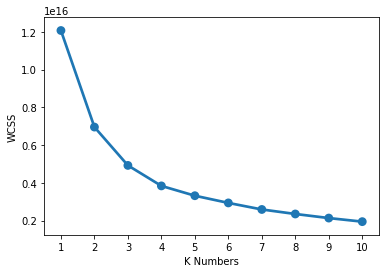

In [155]:
wcss = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters= k, init= 'k-means++', max_iter= 50)
    kmeans.fit(knn)
    wcss[k] = kmeans.inertia_
    print('iteration :')
# plot the WCSS values
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('K Numbers')
plt.ylabel('WCSS')
plt.show()

Normalizacion de la data para encontrar los centroides y poder agrupar

Normalization of the data to find the centroids and be able to group

In [313]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(knn)
data_process_norm = scaler.transform(knn)
data_process_norm_df = pd.DataFrame(knn)
data_process_norm_df.describe().round(2)

H074_PAGAN_ALOJ  H078_CANT_MIEMBROS_HOGAR  H082_SEXO_JEFE  \
count          7046.00                   7046.00         7046.00   
mean              0.00                      3.22            0.38   
std               0.04                      1.63            0.49   
min               0.00                      1.00            0.00   
25%               0.00                      2.00            0.00   
50%               0.00                      3.00            0.00   
75%               0.00                      4.00            1.00   
max               1.00                     17.00            1.00   

       H085_MIEMBROS_OCUPADOS  H090_BONO_VIVIENDA  H091_IMAS_DINERO  \
count                 7046.00             7046.00           7046.00   
mean                     1.28                0.21              0.07   
std                      0.92                0.41              0.25   
min                      0.00                0.00              0.00   
25%                      1.00                0.00              0.00   
50%                      1.00                0.00              0.00   
75%                      2.00                0.00              0.00   
max                      7.00                1.00              1.00   

       H139_SALARIO_NETO_TOTAL  H207_INGRESO_TOTAL_NETO_PC_CVL  \
count                  7046.00                         7046.00   
mean                 457754.38                       346429.45   
std                  741630.80                       486945.00   
min                       0.00                         3055.00   
25%                       0.00                       118237.00   
50%                  273143.50                       201425.50   
75%                  600277.50                       378672.50   
max                17083087.00                     10090453.00   

       H317_INGRESO_DISPONIBLE  H231_GASTO_TOTAL_ALIM_BEBID  \
count                  7046.00                      7046.00   
mean                 737604.51                    130736.82   
std                  933017.06                    107292.38   
min                 -661448.00                      6495.00   
25%                  266082.00                     58287.00   
50%                  473219.50                    103272.00   
75%                  870425.25                    168410.00   
max                19035080.00                   1142772.00   

       H240_GASTO_AGUAS_Y_OTROS  H255_GASTO_TOTAL_SALUD  \
count                   7046.00                 7046.00   
mean                   13828.02                26717.23   
std                    20713.33                72074.46   
min                        0.00                    0.00   
25%                     6000.00                    0.00   
50%                    10000.00                 6000.00   
75%                    15333.00                26662.75   
max                   554358.00              2133333.00   

       H260_GASTO_TOTAL_TRANSPORTE  H274_GASTO_TOTAL_EDUCACION  Cluster  
count                      7046.00                     7046.00  7046.00  
mean                      81073.13                    22166.93     1.74  
std                      177193.64                    80163.91     0.87  
min                     -526097.00                        0.00     0.00  
25%                        3248.50                        0.00     1.00  
50%                       32887.00                        0.00     2.00  
75%                       92758.75                      750.00     2.00  
max                     3681100.00                  1157000.00     4.00

Agregacion de los cluster al dataset

Adding the clusters to the dataset

In [314]:
# Group data set by k-means cluster
knn.groupby(['Cluster']).agg({
    'H085_MIEMBROS_OCUPADOS':'mean',
    'H139_SALARIO_NETO_TOTAL':'mean',
    'H207_INGRESO_TOTAL_NETO_PC_CVL':'mean',
    'H317_INGRESO_DISPONIBLE' : 'mean',
    'H231_GASTO_TOTAL_ALIM_BEBID' : 'mean',
    'H240_GASTO_AGUAS_Y_OTROS' : 'mean',
    'H255_GASTO_TOTAL_SALUD' : 'mean',
    'H260_GASTO_TOTAL_TRANSPORTE' : 'mean',
}).round(0)

H085_MIEMBROS_OCUPADOS  H139_SALARIO_NETO_TOTAL  \
Cluster                                                    
0                           2.0                1933238.0   
1                           1.0                 162610.0   
2                           2.0                 519261.0   
3                           1.0                 307455.0   
4                           1.0                 250173.0   

         H207_INGRESO_TOTAL_NETO_PC_CVL  H317_INGRESO_DISPONIBLE  \
Cluster                                                            
0                             1345234.0                2910891.0   
1                              332445.0                 435823.0   
2                              242269.0                 721130.0   
3                              221377.0                 506174.0   
4                              559456.0                 519718.0   

         H231_GASTO_TOTAL_ALIM_BEBID  H240_GASTO_AGUAS_Y_OTROS  \
Cluster                                                          
0                           242308.0                   42684.0   
1                            87779.0                   11406.0   
2                           149053.0                   11673.0   
3                           126362.0                   11791.0   
4                           114656.0                   21211.0   

         H255_GASTO_TOTAL_SALUD  H260_GASTO_TOTAL_TRANSPORTE  
Cluster                                                       
0                      128845.0                     408014.0  
1                       19463.0                      35732.0  
2                       19230.0                      74834.0  
3                       17400.0                      52561.0  
4                       26217.0                     122686.0

In [312]:
Cluster_Solution= knn.reset_index()
Cluster_Solution= pd.DataFrame(Cluster_Solution)
Cluster_Solution.head()

index  H074_PAGAN_ALOJ  H078_CANT_MIEMBROS_HOGAR  H082_SEXO_JEFE  \
0      0                0                       3.0               0   
1      1                0                       2.0               1   
2      2                0                       3.0               1   
3      3                0                       1.0               0   
4      4                0                       1.0               1   

  H083_EDAD_JEFE  H085_MIEMBROS_OCUPADOS  H090_BONO_VIVIENDA  \
0             29                     1.0                   0   
1             29                     1.0                   0   
2             27                     0.0                   0   
3             75                     1.0                   0   
4             51                     1.0                   0   

   H091_IMAS_DINERO  H139_SALARIO_NETO_TOTAL  H207_INGRESO_TOTAL_NETO_PC_CVL  \
0                 0                 281618.0                        123464.0   
1                 0                 209783.0                        150392.0   
2                 0                      0.0                         59094.0   
3                 0                      0.0                        380409.0   
4                 0                 243959.0                        539712.0   

   H317_INGRESO_DISPONIBLE  H231_GASTO_TOTAL_ALIM_BEBID  \
0                 294868.0                     149391.0   
1                 293229.0                      91844.0   
2                 101757.0                      32607.0   
3                 249953.0                      91237.0   
4                 408427.0                      65460.0   

   H240_GASTO_AGUAS_Y_OTROS  H255_GASTO_TOTAL_SALUD  \
0                    8000.0                  4000.0   
1                       0.0                 12667.0   
2                       0.0                 11500.0   
3                    2000.0                  1500.0   
4                    8400.0                     0.0   

   H260_GASTO_TOTAL_TRANSPORTE  H274_GASTO_TOTAL_EDUCACION  Cluster  
0                          0.0                         0.0        2  
1                      26567.0                       167.0        1  
2                       2083.0                       583.0        1  
3                          0.0                         0.0        1  
4                     164633.0                         0.0        1

Utilizacion de Ploty con lo que observamos el comportamiento de cada  grupo segun Ingresos y Gastos

Use of Ploty with which we observe the behavior of each group according to Income and Expenses

In [231]:
import plotly.io as pio

trace1 = go.Bar(
                x = Cluster_Solution.Cluster,
                y = Cluster_Solution.H139_SALARIO_NETO_TOTAL,
                name = "Salary",
                marker = dict(color = 'rgba(12, 227, 194, 0.10)',
                             line=dict(color='rgb(12, 227, 194)',width=1.5)),
                text = Cluster_Solution.Cluster)
# create trace2 
trace2 = go.Bar(
                x = Cluster_Solution.Cluster,
                y = Cluster_Solution.H207_INGRESO_TOTAL_NETO_PC_CVL,
                name = "Total Income per Family",
                marker = dict(color = 'rgba(12, 166, 194, 0.10)',
                              line=dict(color='rgb(12, 166, 194)',width=1.5)),
                text = Cluster_Solution.Cluster)

trace3 = go.Bar(
                x = Cluster_Solution.Cluster,
                y = Cluster_Solution.H231_GASTO_TOTAL_ALIM_BEBID,
                name = "Total Outcome by Food",
                marker = dict(color = 'rgba(32, 227, 244, 0.10)',
                              line=dict(color='rgb(32, 227, 244)',width=1.5)),
                text = Cluster_Solution.Cluster)

data = [trace1, trace2,trace3]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
pio.show(fig)

Con esta solucion ya tenemos la informacion necesaria para poder  agrupar a cada familia segun un  grupo especifico, con esto poder ofrecer cualquiera de los  cinco Bonos que otorga el  gobierno. Con esta herramienta utilizando kmeans se puede saber con  perfeccion que  tipo de bono es el que se necesita brindar, crear politicas mas especializadas,  y poder tener la capacidad de realmente llegar a combatir la pobreza en Costa Rica.

With this solution we already have the necessary information to be able to group each family according to a specific group, with this to be able to offer any of the five Bonds that the government grants. With this tool, using kmeans, it is possible to know with perfection what type of bonus is the one that needs to be provided, to create more specialized policies, and to be able to really get to fight poverty in Costa Rica.

¡GRACIAS POR  ESTUDIAR EL CASO !

THANK YOU FOR STUDYING THE CASE!

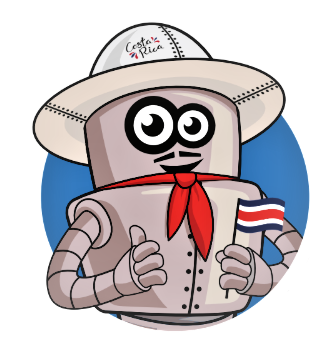

In [316]:
from PIL import Image               # to load images
from IPython.display import display
pil_im = Image.open('C:\\Users\MSI\\OneDrive\\Zero\\Xero_Robot2.png')
display(pil_im)